In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import os
import statsmodels.api as sm
import seaborn as sns

In [2]:
data_init = pd.read_csv('kdd_train.csv')

data_init.head(5)
data=data_init.loc[data_init['labels']=='normal']
#data_init['num_outbound_cmds'].describe()


In [3]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,67343.000000,6.734300e+04,6.734300e+04,67343.000000,67343.0,67343.000000,67343.000000,67343.000000,67343.000000,67343.000000,...,67343.000000,67343.000000,67343.000000,67343.000000,67343.000000,67343.000000,67343.000000,67343.000000,67343.000000,67343.000000
mean,168.587396,1.313328e+04,4.329685e+03,0.000104,0.0,0.000148,0.230655,0.001381,0.710646,0.507076,...,147.431923,190.285761,0.811875,0.040134,0.121726,0.025996,0.013930,0.006116,0.046589,0.044698
std,1304.452127,4.181131e+05,6.546282e+04,0.010195,0.0,0.017233,2.308336,0.049480,0.453466,32.743321,...,101.785400,92.608377,0.324091,0.128529,0.254382,0.068807,0.092006,0.056724,0.195306,0.192188
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.290000e+02,1.050000e+02,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,40.000000,121.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.330000e+02,3.790000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,156.000000,255.000000,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.240000e+02,2.056000e+03,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.020000,0.080000,0.030000,0.000000,0.000000,0.000000,0.000000
max,40504.000000,8.958152e+07,7.028652e+06,1.000000,0.0,3.000000,77.000000,4.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [5]:
mapping_dict = {'tcp':0,
                'udp':1,
                'icmp':2  }

data['protocol_type'] = data['protocol_type'].map(mapping_dict)

/home/ayush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [6]:
mapping_dict1 = {'SF':0,
                'S0':1,
                'REJ':2,
               'RSTR':3,
                'SH':4,
                'RSTO':5,
                'S1':6,
                'RSTOS0':7,
                'S3':8,
                'S2':9,
                'OTH':10
               }

data['flag'] = data['flag'].map(mapping_dict1)

/home/ayush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
a=data_init['service'].unique().tolist()
mapping_dict2={}
for i in range(len(a)):
    mapping_dict2[a[i]]=i
print(mapping_dict2)
data['service'] = data['service'].map(mapping_dict2)

{'ftp_data': 0, 'other': 1, 'private': 2, 'http': 3, 'remote_job': 4, 'name': 5, 'netbios_ns': 6, 'eco_i': 7, 'mtp': 8, 'telnet': 9, 'finger': 10, 'domain_u': 11, 'supdup': 12, 'uucp_path': 13, 'Z39_50': 14, 'smtp': 15, 'csnet_ns': 16, 'uucp': 17, 'netbios_dgm': 18, 'urp_i': 19, 'auth': 20, 'domain': 21, 'ftp': 22, 'bgp': 23, 'ldap': 24, 'ecr_i': 25, 'gopher': 26, 'vmnet': 27, 'systat': 28, 'http_443': 29, 'efs': 30, 'whois': 31, 'imap4': 32, 'iso_tsap': 33, 'echo': 34, 'klogin': 35, 'link': 36, 'sunrpc': 37, 'login': 38, 'kshell': 39, 'sql_net': 40, 'time': 41, 'hostnames': 42, 'exec': 43, 'ntp_u': 44, 'discard': 45, 'nntp': 46, 'courier': 47, 'ctf': 48, 'ssh': 49, 'daytime': 50, 'shell': 51, 'netstat': 52, 'pop_3': 53, 'nnsp': 54, 'IRC': 55, 'pop_2': 56, 'printer': 57, 'tim_i': 58, 'pm_dump': 59, 'red_i': 60, 'netbios_ssn': 61, 'rje': 62, 'X11': 63, 'urh_i': 64, 'http_8001': 65, 'aol': 66, 'http_2784': 67, 'tftp_u': 68, 'harvest': 69}


/home/ayush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
features=data.columns.tolist()[:-1]
Y=data['labels']
X=data[features]

In [9]:

#del(X['num_outbound_cmds'])

In [10]:
from sklearn.preprocessing import normalize
X_normalized, norms = normalize(X, norm='l2', return_norm=True)
#print(X_normalized)

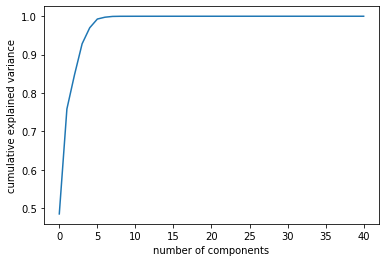

In [11]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_normalized)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [12]:
pca=PCA(n_components=5)
pca.fit(X_normalized)
X_reduced=pca.transform(X_normalized)
lis=[]
for i in range(1,6):
    lis.append("column"+str(i))
X_reduced = pd.DataFrame(data = X_reduced,columns = lis)

In [13]:
#X_reduced.describe()
print(X_reduced)
print(type(X_reduced['column1']))

        column1   column2   column3   column4   column5
0      0.659156  0.567278  0.098749 -0.092638 -0.010647
1      0.672008  0.005334  0.420320 -0.406085 -0.161827
2     -0.597478 -0.017895  0.076717  0.034644  0.028760
3      0.000737 -0.152021 -0.130488 -0.174118 -0.089061
4     -0.536072  0.026197  0.002358  0.029036  0.021561
...         ...       ...       ...       ...       ...
67338  0.430257  0.729193  0.010581  0.047718  0.076925
67339  0.012648  0.241459 -0.319257  0.092711 -0.005046
67340  0.369549 -0.359700 -0.100039 -0.133441 -0.238056
67341  0.460532  0.673671  0.030944 -0.030768  0.040046
67342  0.720410 -0.091695  0.227597 -0.313986 -0.217613

[67343 rows x 5 columns]
<class 'pandas.core.series.Series'>


In [14]:
from numpy.random import seed
#from tensorflow import set_random_seed
import tensorflow
from keras.layers import Input,Dropout
from keras.layers.core import Dense
from keras.models import Model,Sequential,load_model
from keras import regularizers
from keras.models import model_from_json

Using TensorFlow backend.


In [15]:
#""""
#seed(10)
#act_func='elu'
#model=Sequential()
#model.add(Dense(10,activation=act_func,kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.0),input_shape=(X_reduced.shape[1],)))
#model.add(Dense(2,activation=act_func,kernel_initializer='glorot_uniform'))
#model.add(Dense(10,activation=act_func,kernel_initializer='glorot_uniform'))
#model.add(Dense(X_reduced.shape[1],kernel_initializer='glorot_uniform'))
#model.compile(loss='mse',optimizer='adam')
#NUM_EPOCHS=30
#BATCH_SIZE=10
#""""


In [16]:
#history=model.fit(np.array(X_reduced),np.array(X_reduced),batch_size=BATCH_SIZE,epochs=NUM_EPOCHS,validation_split=0.05,verbose=1)
#model.save('t2tmodel.h5')
#new_model = tensorflow.keras.models.load_model('t2tmodel.h5')

from keras.models import load_model
model = load_model('t2tmodel')

In [17]:
# plt.plot(history.history['loss'],'b',label='Training loss')
# plt.plot(history.history['val_loss'],'r',label='Validation loss')
# plt.legend(loc='upper right')
# plt.xlabel('Epochs')
# plt.ylabel('Loss,[mse]')
# plt.ylim([0,.1])
# plt.show()

In [18]:

X_pred=model.predict(np.array(X_reduced))

print(X_pred)

[[ 0.6680492   0.5409792   0.08689901 -0.05402509 -0.00522541]
 [ 0.6531236  -0.01969615  0.45396066 -0.3277461  -0.18531077]
 [-0.6017021  -0.00917314  0.08081698  0.01417907  0.02402119]
 ...
 [ 0.356628   -0.32705146 -0.05296588 -0.15523154 -0.21766229]
 [ 0.47292075  0.6330303  -0.02276993 -0.03537741  0.03083925]
 [ 0.6871091  -0.06219749  0.22894108 -0.3145086  -0.18044947]]


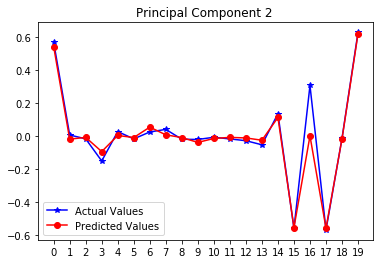

Text(0.5, 1.0, 'Deviation of predicted value from actual value ')

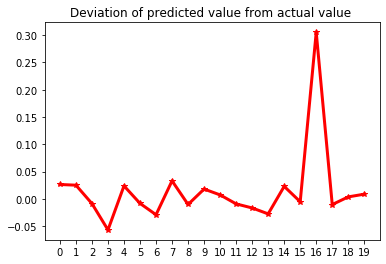

In [19]:
col2_true=np.array(X_reduced['column2'])
col2_pred=np.array(X_pred[:,1])
#col1_true = X_reduced['Column1']
col2_true_f = np.array(col2_true[0:20])
col2_pred_f = np.array(col2_pred[0:20])

l1, = plt.plot(col2_true_f, 'b*-')
l2, = plt.plot(col2_pred_f, 'ro-')
plt.xticks(list(range(0,20)))
plt.title("Principal Component 2 ")
plt.legend(['Actual Values', 'Predicted Values'])
plt.show()

deviation = np.array(col2_true_f - col2_pred_f)
plt.xticks(list(range(0,20)))
plt.plot(deviation, 'r*-', linewidth=3)
#plt.legend([''])
plt.title("Deviation of predicted value from actual value ")


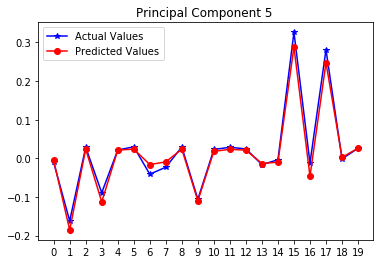

Text(0.5, 1.0, 'Deviation of predicted value from actual value ')

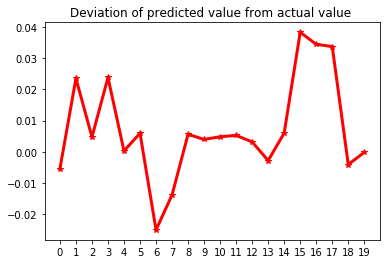

In [20]:
col5_true=np.array(X_reduced['column5'])
col5_pred=np.array(X_pred[:,4])
#col1_true = X_reduced['Column1']
col5_true_f = np.array(col5_true[0:20])
col5_pred_f = np.array(col5_pred[0:20])

l1, = plt.plot(col5_true_f, 'b*-')
l2, = plt.plot(col5_pred_f, 'ro-')
plt.xticks(list(range(0,20)))
plt.title("Principal Component 5 ")
plt.legend(['Actual Values', 'Predicted Values'])
plt.show()

deviation = np.array(col5_true_f - col5_pred_f)
plt.xticks(list(range(0,20)))
plt.plot(deviation, 'r*-', linewidth=3)
#plt.legend([''])
plt.title("Deviation of predicted value from actual value ")

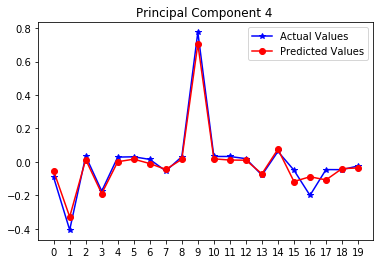

Text(0.5, 1.0, 'Deviation of predicted value from actual value ')

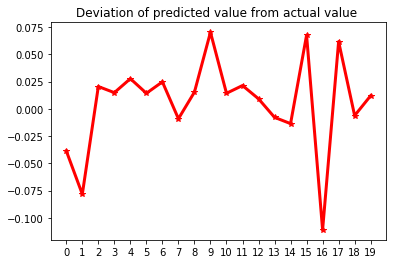

In [21]:
col4_true=np.array(X_reduced['column4'])
col4_pred=np.array(X_pred[:,3])
#col1_true = X_reduced['Column1']
col4_true_f = np.array(col4_true[0:20])
col4_pred_f = np.array(col4_pred[0:20])

l1, = plt.plot(col4_true_f, 'b*-')
l2, = plt.plot(col4_pred_f, 'ro-')
plt.xticks(list(range(0,20)))
plt.title("Principal Component 4 ")
plt.legend(['Actual Values', 'Predicted Values'])
plt.show()

deviation = np.array(col4_true_f - col4_pred_f)
plt.xticks(list(range(0,20)))
plt.plot(deviation, 'r*-', linewidth=3)
#plt.legend([''])
plt.title("Deviation of predicted value from actual value ")

In [22]:
test_mae_loss = np.mean(np.abs(X_pred-X_reduced))
print(test_mae_loss)
test_mae_loss_avg_vector = np.mean(test_mae_loss)
print(test_mae_loss_avg_vector)
treshold=test_mae_loss_avg_vector
treshold=0.046899

column1    0.031235
column2    0.029257
column3    0.029319
column4    0.032991
column5    0.018136
dtype: float64
0.028187652868851915


In [23]:
print(len(norms))

67343


In [24]:

anm_data=data_init.loc[data_init['labels']!='normal']
print(anm_data['service'].unique())
anm_data['protocol_type'] = anm_data['protocol_type'].map(mapping_dict)
anm_data['flag'] = anm_data['flag'].map(mapping_dict1)
anm_data['service'] =anm_data['service'].map(mapping_dict2)
Y_anm=anm_data['labels']
X_anm=anm_data[features]
X_anm.isnull().sum()
#X_anm['service'].unique()


['private' 'remote_job' 'ftp_data' 'name' 'netbios_ns' 'eco_i' 'mtp'
 'finger' 'supdup' 'uucp_path' 'Z39_50' 'csnet_ns' 'uucp' 'netbios_dgm'
 'http' 'auth' 'domain' 'ftp' 'bgp' 'ldap' 'ecr_i' 'gopher' 'telnet'
 'vmnet' 'systat' 'http_443' 'efs' 'whois' 'other' 'imap4' 'iso_tsap'
 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell' 'sql_net' 'time'
 'hostnames' 'exec' 'discard' 'nntp' 'courier' 'ctf' 'ssh' 'smtp'
 'daytime' 'shell' 'netstat' 'nnsp' 'pop_2' 'printer' 'tim_i' 'pop_3'
 'pm_dump' 'netbios_ssn' 'rje' 'urp_i' 'http_8001' 'X11' 'domain_u' 'aol'
 'http_2784' 'IRC' 'harvest']


/home/ayush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ayush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/ayush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [25]:
#del(X_anm['num_outbound_cmds'])
X_anm_normalized, norms = normalize(X_anm, norm='l2', return_norm=True)
X_anm_reduced=pca.transform(X_anm_normalized)
X_anm_reduced = pd.DataFrame(data = X_anm_reduced,columns = lis)
X_anm_pred=model.predict(np.array(X_anm_reduced))
test_mae_loss = np.mean(np.abs(X_anm_pred-X_anm_reduced))
print(test_mae_loss)
test_mae_loss_avg_vector = np.mean(test_mae_loss)
print(test_mae_loss_avg_vector)

column1    0.058705
column2    0.055679
column3    0.240111
column4    0.063054
column5    0.105227
dtype: float64
0.10455508774307609


count    58630.000000
mean         0.104555
std          0.047552
min          0.004611
25%          0.060626
50%          0.112540
75%          0.139754
max          0.438675
dtype: float64

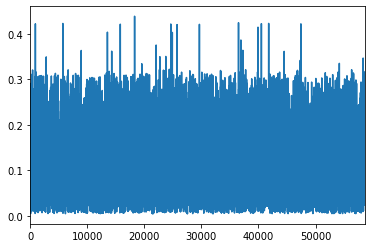

In [26]:
ans=np.abs(X_anm_pred - X_anm_reduced)
#print(ans[0:1])
ans_df=pd.DataFrame(ans,columns=lis)
ans_means=ans_df.mean(axis=1)
ans_means.plot()
ans_means.describe()


In [27]:
TN=[]
FP=[]
for i in ans_means:
    if(i>(treshold)):
        TN.append(i)
    else:
        FP.append(i)


count    67343.000000
mean         0.028188
std          0.031575
min          0.002699
25%          0.010617
50%          0.018193
75%          0.033172
max          0.499083
dtype: float64

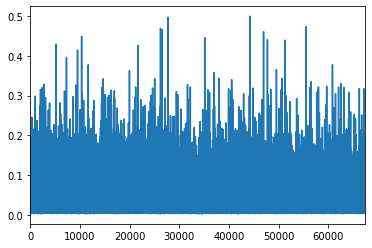

In [28]:
TP=[]
FN=[]
ans_n=np.abs(X_pred-X_reduced)
ans_n_df=pd.DataFrame(ans_n,columns=lis)
ans_n_means=ans_n_df.mean(axis=1)
ans_n_means.plot()
ans_n_means.describe()

In [29]:
print(ans_n_means[16])
if ans_n_means[16] > 0.047:
    print("An anomaly")
for i in ans_n_means:
    if(i<(treshold)):
        TP.append(i)
    else:
        FN.append(i)
print(len(TP))
print(len(FN))

0.1300205048060225
An anomaly
57427
9916


In [30]:
print("accuracy")
print((len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN)))
print("precision")
print((len(TP)/(len(TP)+len(FP))))
print("recall")
print((len(TP)/(len(TP)+len(FN))))

accuracy
0.8858168020131298
precision
0.9278132320865983
recall
0.8527538125714625


In [31]:
test_data=pd.read_csv('kdd_test.csv')
test_data['protocol_type'] = test_data['protocol_type'].map(mapping_dict)
test_data['flag'] = test_data['flag'].map(mapping_dict1)
test_data['service'] =test_data['service'].map(mapping_dict2)
Y_test=test_data['labels']
X_test=test_data[features]

#del(X_test['num_outbound_cmds'])
X_test_normalized, norms = normalize(X_test, norm='l2', return_norm=True)
X_test_reduced=pca.transform(X_test_normalized)
X_test_reduced = pd.DataFrame(data = X_test_reduced,columns = lis)
X_test_pred=model.predict(np.array(X_test_reduced))
#test_data=pd.read_csv('kdd_test.csv')
#test_data['protocol_type'] = test_data['protocol_type'].map(mapping_dict)
#test_data['flag'] = test_data['flag'].map(mapping_dict1)
#test_data['service'] =test_data['service'].map(mapping_dict2)
#Y_test=test_data['labels']
#X_test=test_data[features]

#del(X_test['num_outbound_cmds'])
#X_test_normalized, norms = normalize(X_test, norm='l2', return_norm=True)
#X_test_reduced=pca.transform(X_test_normalized)
#X_test_reduced = pd.DataFrame(data = X_test_reduced,columns = lis)
#X_test_pred=model.predict(np.array(X_test_reduced))



In [32]:

X_test_diff=np.abs(X_test_pred-X_test_reduced)
ans_test_df=pd.DataFrame(ans_n,columns=lis)
ans_test_means=ans_test_df.mean(axis=1)
Y_test_pred=[]
for i in ans_test_means:
    if(i<treshold):
        Y_test_pred.append('normal')
    else:
        Y_test_pred.append('anaomaly')



In [33]:
for i in range(len(Y_test)):
    if(Y_test[i]!='normal'):
        Y_test[i]='anaomaly'

/home/ayush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
for i in range(len(Y_test)):
    if(Y_test_pred[i] == 'normal'):
        if(Y_test[i]=='normal'):
            TP.append(i)
        else:
            FP.append(i)
    else:
        if(Y_test[i]!='normal'):
            TN.append(i)
        else:
            FN.append(i)
print("accuracy")
print((len(TP)+len(TN))/(len(TP)+len(TN)+len(FP)+len(FN)))
print("precision")
print((len(TP)/(len(TP)+len(FP))))
print("recall")
print((len(TP)/(len(TP)+len(FN))))

accuracy
0.8263835116518647
precision
0.8256188256188256
recall
0.8518094365551993


In [35]:
#model.save("t2tmodel")

In [36]:
def predict():
    test_data=pd.read_csv('kdd_test.csv')
    test_data['protocol_type'] = test_data['protocol_type'].map(mapping_dict)
    test_data['flag'] = test_data['flag'].map(mapping_dict1)
    test_data['service'] =test_data['service'].map(mapping_dict2)
    Y_test=test_data['labels']
    X_test=test_data[features]

    #del(X_test['num_outbound_cmds'])
    X_test_normalized, norms = normalize(X_test, norm='l2', return_norm=True)
    X_test_reduced=pca.transform(X_test_normalized)
    X_test_reduced = pd.DataFrame(data = X_test_reduced,columns = lis)
    X_test_pred=model.predict(np.array(X_test_reduced))
    
    
    X_test_diff=np.abs(X_test_pred-X_test_reduced)
    ans_test_df=pd.DataFrame(ans_n,columns=lis)
    ans_test_means=ans_test_df.mean(axis=1)
    Y_test_pred=[]
    for i in ans_test_means:
        if(i<treshold):
            Y_test_pred.append('normal')
        else:
            Y_test_pred.append('anaomaly')
    
    print(Y_test_pred)

In [37]:
predict()

['normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'anaomaly', 'anaomaly', 'anaomaly', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'anaomaly', 'anaomaly', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'anaomaly', 'normal', 'normal', 'normal', 'normal', 'normal', 'anaomaly', 'normal', 'normal', 'normal', 'normal', 'anaomaly', 'normal', 'normal', 'anaomaly', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'anaomaly', 'anaomaly', 'normal', 'normal', 'normal', 'normal', 'anaomaly', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'anaomaly', 'anaomaly', 'normal', 'normal', 'anaomaly', 'normal', 'normal', 'anaomaly', 'normal', 'anaomaly', 'normal', 'normal', 'anaomaly', 'anaomaly', 'normal', 'normal', '